In [9]:
import sys
import os
import numpy
print(sys.executable)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import importlib
seaborn_found = importlib.util.find_spec('seaborn')
if seaborn_found is None:
    sys.write.stderr("[error] Seaborn package not found. exit")
    exit(-1)

import seaborn as sns
import pandas as pd

import matplotlib as mpl

#mpl.use("pgf")

import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": False,     # use inline math for ticks
    "pgf.rcfonts": False,    # don't setup fonts from rc parameters
    "pgf.preamble": [
         "\\usepackage{units}",          # load additional packages
         "\\usepackage{metalogo}",
         "\\usepackage{unicode-math}",   # unicode math setup
         r"\setmathfont{xits-math.otf}",
         ]
})


plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times"],                    # use latex default serif font
    "font.size": "22",
})

plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "pgf.preamble": [
         r"\usepackage[utf8x]{inputenc}",
         r"\usepackage[T1]{fontenc}",
         r"\usepackage{cmbright}",
         ]
})

# plt.rc('text', usetex=True)

sns.set(style="ticks", color_codes=True, font_scale=1.3)
sns.set_context("paper", rc={"axes.labelsize":14, "axes.titlesize":14, "legend.fontsize":14, "xtick.labelsize":14, "ytick.labelsize":14, "font.size":14})

sns.set_style("darkgrid", {'xtick.bottom': True, 'xtick.top': False, 'ytick.left': True, 'ytick.right': False, 'axes.grid': True, "axes.facecolor": ".9", 'grid.linestyle': '-', 'lines.linewidth':2.5})
# sns.set_palette("dark")

DIR_DATA="/Users/lpottier/research/usc-isi/projects/active/workflow-io-bb/simulation/output"

fig_size_square = (5, 4)
fig_size_rect = (6.5, 4)

/usr/local/opt/python/bin/python3.7


In [10]:
csv_file = DIR_DATA+"/1000genome.csv"

CORE="1"
PLOT_DIR=os.getcwd()
# PLOT_DIR="/Users/lpottier/research/usc-isi/projects/paper-workflow-bb/figures/plots/simu-swarp"

OUTPUT = PLOT_DIR+"/"+"simu-1000Genome/"

In [11]:
try:
    # Create target Directory
    os.mkdir(OUTPUT)
    print("Directory " , OUTPUT ,  " Created ") 
except FileExistsError:
    print("Directory " , OUTPUT ,  " already exists")

Directory  /Users/lpottier/research/usc-isi/projects/active/workflow-io-bb/data/traces/notebooks/simu-1000Genome/  already exists


In [12]:
df = pd.read_csv(csv_file, sep=',')

In [30]:
#workflow,nbfilesinbb,cori,summit
#1000Genome,0,17352.37,

def plot_workflow_input_files(df):

    xlabel='Input files in burst buffers (%)'
    ylabel='Execution time (s)'
    

    df2 = df.copy()
    
    df2.nbfilesinbb = (df2.nbfilesinbb*100)/22
    df2.rename(columns={'cori':'Cori'}, inplace=True)
    df2.rename(columns={'summit':'Summit'}, inplace=True)
    
    if len(df2.workflow.unique()) != 1:
        print("More than workflow in this data frame")
        return None
    
    f = plt.figure(figsize=fig_size_rect)
    f.patch.set_alpha(0)

    g = sns.lineplot(x="nbfilesinbb", y="Cori", data=df2,  color="b", markers=True)
    g = sns.lineplot(x="nbfilesinbb", y="Summit", data=df2,  color="g", markers=True)

    g.legend(loc='upper right', title='', labels=['Cori', 'Summit'])

    g.set(xlabel=xlabel, ylabel=ylabel)
    # plt.grid()

    plt.tight_layout()
    plt.savefig(OUTPUT+df2.workflow.unique()[0]+'-simu-nbfile.pdf', facecolor=f.get_facecolor(), edgecolor='none')
    plt.savefig(OUTPUT+df2.workflow.unique()[0]+'-simu-nbfile.pgf', facecolor=f.get_facecolor(), edgecolor='none')
    plt.show()


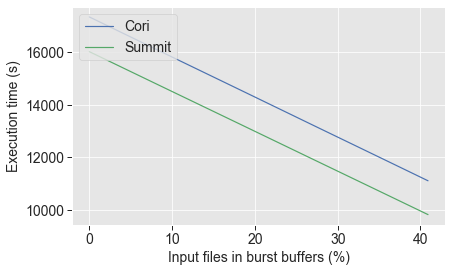

In [31]:
plot_workflow_input_files(df)